In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np
from tqdm import tqdm
from jax import config
config.update("jax_enable_x64", True)
import jax
import jax.numpy as jnp

WDIR = os.environ['DM21CM_DIR']

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [2]:
def get_rec(rn):
    return np.load(f"../outputs/dm21cm/{rn}_records.npy", allow_pickle=True).item()

In [43]:
! cp $DM21CM_DIR/outputs/dm21cm/fc_001_records.npy ./fc_001-001_records.npy

In [44]:
run_names = [
    'fc_01-01',
    'fc_005-01',
    'fc_002-01',
    'fc_001-01',
    'fc_001-001',
]
r_s = [np.load(f"{rn}_records.npy", allow_pickle=True).item() for rn in run_names]

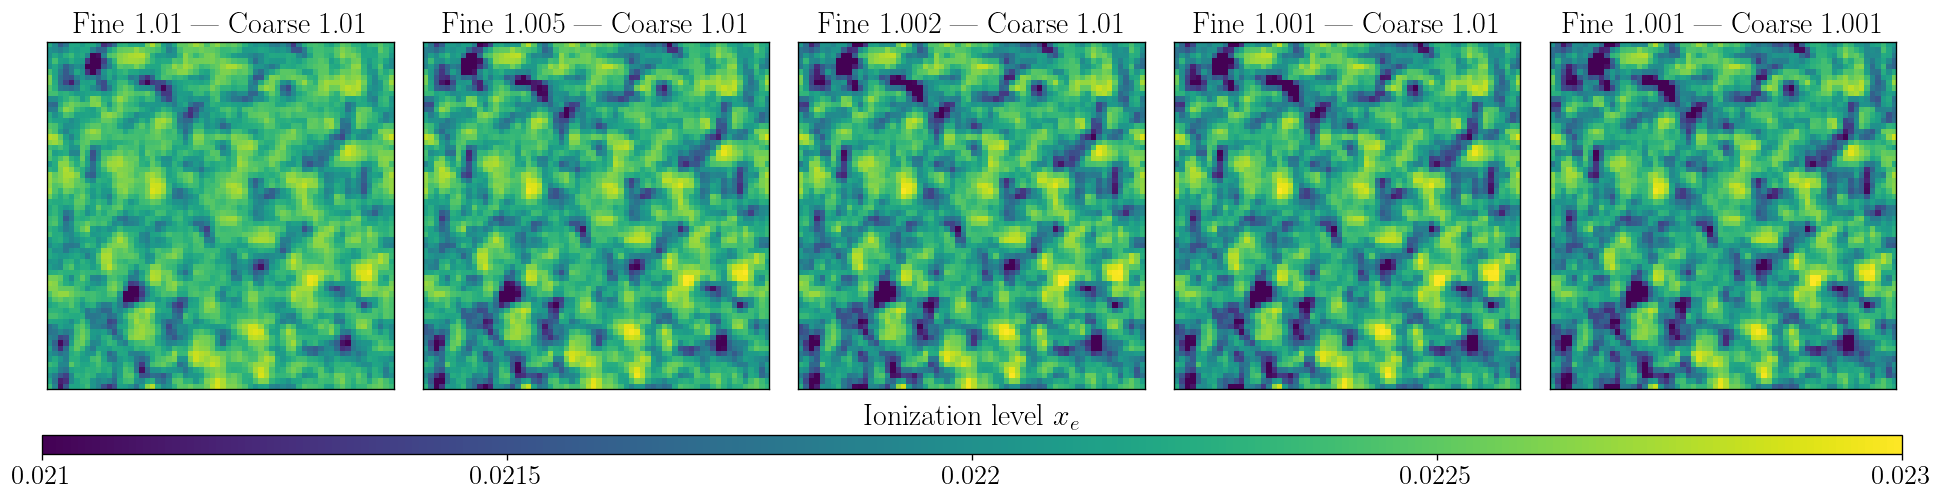

In [45]:
k_plot = 'x_H_slice'
i_plot = -1
shift_mean = None
plot_log = False
titles = ['zf01-01', 'zf005-01', 'zf002-01', 'zf001-01', 'zf001-001']
zfs_fine = [1.01, 1.005, 1.002, 1.001, 1.001]
zfs_coarse = [1.01, 1.01, 1.01, 1.01, 1.001]

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

z_s = [r[k_plot][i_plot] for r in r_s]
if k_plot == 'x_H_slice':
    z_s = [1-z for z in z_s]
z_mean_s = [np.mean(z) for z in z_s]
if shift_mean is not None:
    if shift_mean == '+':
        z_s = [z-z_mean_s[i_plot] for i_plot, z in enumerate(z_s)]
    else:
        z_s = [z/z_mean_s[i_plot] for i_plot, z in enumerate(z_s)]
if plot_log:
    z_s = [np.log10(z) for z in z_s]
# vmin = np.quantile(np.concatenate(z_s), 0.02)
# vmax = np.quantile(np.concatenate(z_s), 0.98)
vmin = 0.021
vmax = 0.023

for i_plot in range(len(r_s)):
    ax = axs[i_plot]
    im = ax.imshow(z_s[i_plot], origin='lower', vmin=vmin, vmax=vmax)
    ax.set(xticks=[], yticks=[])
    ax.set(title=f'Fine {zfs_fine[i_plot]} | Coarse {zfs_coarse[i_plot]}')
    # t = ax.text(0.93, 0.93, r'Fine $z/z_\mathrm{next}=$'+f'{zfs_fine[i_plot]}\n'+\
    #                         r'Coarse $z/z_\mathrm{next}=$'+f'{zfs_coarse[i_plot]}', transform=ax.transAxes, ha='right', va='top')
    # t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='none'))

fig.subplots_adjust(wspace=0.05)
cbar = fig.colorbar(im, ax=axs[:len(r_s)], orientation='horizontal', aspect=len(r_s)*20, pad=0.1);
cbar.ax.set_xticks([0.021, 0.0215, 0.022, 0.0225, 0.023])
cbar.ax.set_xticklabels([0.021, 0.0215, 0.022, 0.0225, 0.023])
cbar.ax.set_title(r'Ionization level $x_e$', loc='center')

plt.savefig('field-convergence.pdf', bbox_inches='tight')

## Get last cached box

In [ ]:
run_names = [
    'fc_01-01',
    'fc_005-01',
    'fc_002-01',
    'fc_001-01',
    'fc_001-001',
]

In [3]:
run_name = 'fc_001-01'

In [ ]:
cache_dir = os.environ['P21C_CACHE_DIR'] + '/' + run_name
